**Recognizing hand-written digits**


In [352]:

print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


**Digits dataset**

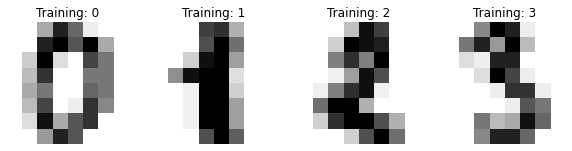

In [353]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

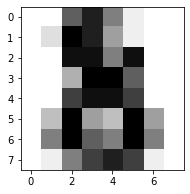

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [354]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
digits.images[-1]

In [355]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [356]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
#clf.fit(data[:n_samples], digits.target[:n_samples])

In [357]:

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)



In [358]:

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

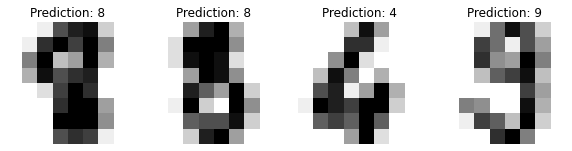

In [359]:

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [360]:

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


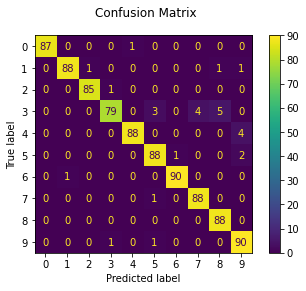

In [361]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

**Dự đoán chữ số từ Webcam**

In [362]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='image.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [363]:
from IPython.display import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import img_as_ubyte		#convert float to uint8
from skimage.color import rgb2gray
def predict():
  try:
    filename = take_photo()
    print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
    #Edit input image
 
  inputImg = cv2.imread("/content/image.jpg")
  # print(inputImg)
  # print(inputImg)
  inputImg = cv2.resize(inputImg, (8, 8), interpolation = cv2.INTER_AREA)
  inputImg = cv2.cvtColor(inputImg, cv2.COLOR_BGR2GRAY)
  inputImg = 16-(inputImg/16)
  predicted=clf.predict(inputImg.reshape(1,64))

  print('prediction:',predicted)

<IPython.core.display.Javascript object>

Saved to image.jpg


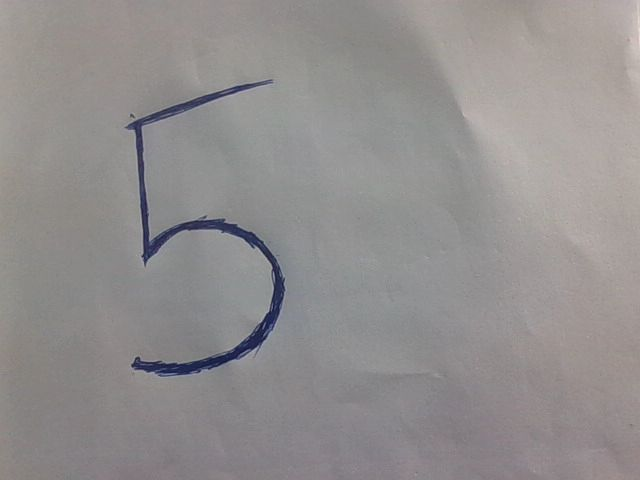

prediction: [9]


<IPython.core.display.Javascript object>

Saved to image.jpg


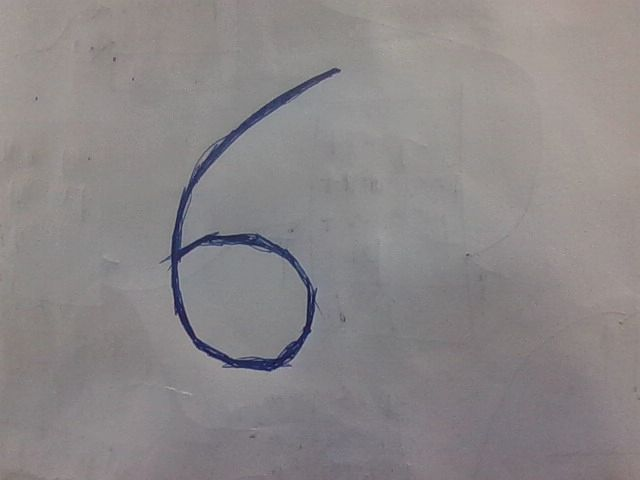

prediction: [9]


<IPython.core.display.Javascript object>

Saved to image.jpg


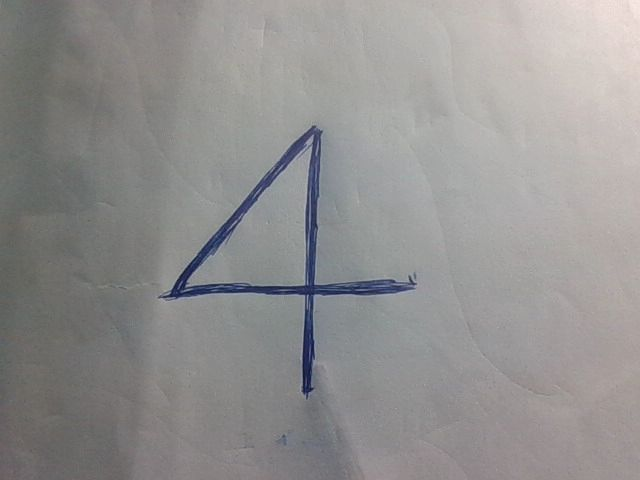

prediction: [5]


<IPython.core.display.Javascript object>

Saved to image.jpg


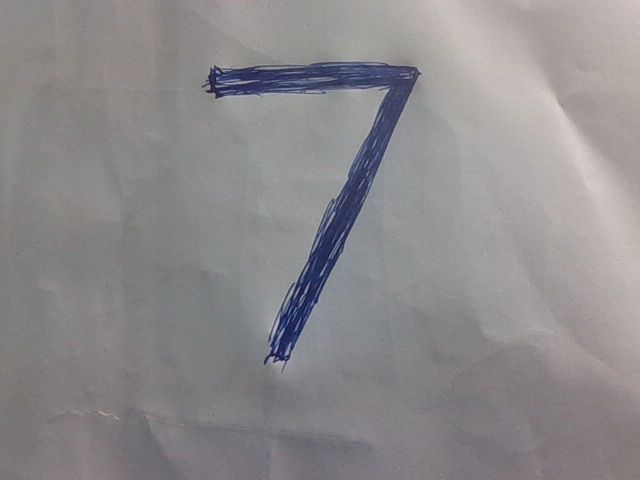

prediction: [2]


<IPython.core.display.Javascript object>

Saved to image.jpg


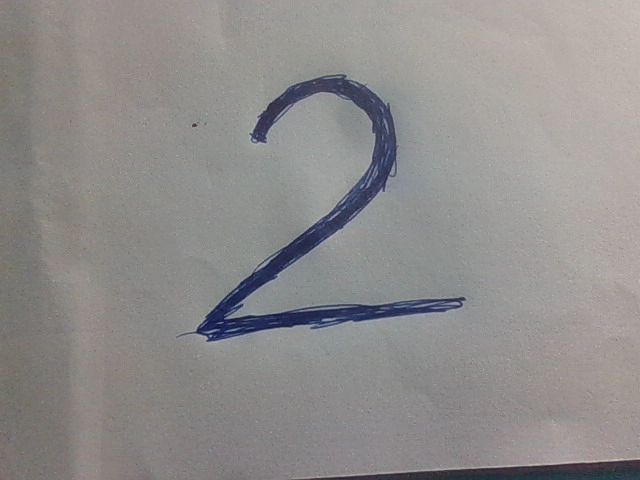

prediction: [8]


<IPython.core.display.Javascript object>

Saved to image.jpg


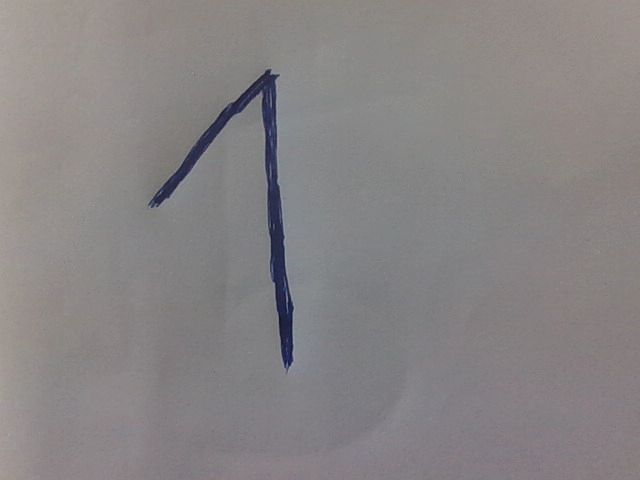

prediction: [9]


<IPython.core.display.Javascript object>

Saved to image.jpg


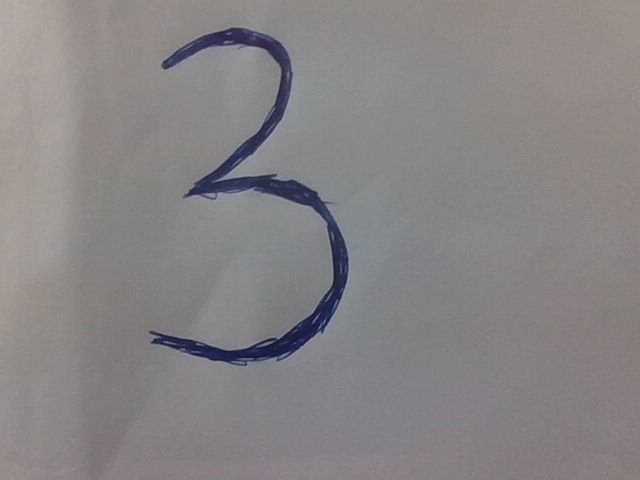

prediction: [9]


In [364]:
for i in range(7):
  predict()
  

**Kết luận bài toán nhận diện chữ viết tay thông qua Webcam**



1. ***Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?***


*   Kết quả thực tế trên webcam của laptop không thực sự tốt



2. ***Ủa mà nhìn vào đâu để kết luận là tốt hay không?***

    

*   Sau khi thử nhận diện 7 chữ số thì mô hình hoạt động không tốt và không cho kết quả như mong muốn


3. ***Nếu không tốt thì lý do tại sao?Nếu không tốt thì lý do tại sao?***

   

*    Lý do có thể quá trình tiền xử lí chưa tốt
*   Các điều kiện ngoài cảnh như ánh sáng, chất lượng webcam, độ gần xa của chữ khiến cho model nhận diện không được tốt

xử lí chưa tốt
4.  ***Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?***


*   Nếu model này tốt thì vẫn có thể sử dụng cho các bài toán phức tạp nhưng quá trình tiền xử lí phải thật tốt 









